In [2]:
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import norm
from scipy import stats

## 데이터셋 불러오기

In [3]:
train_data = pd.read_csv('Adv_IMC_train.csv')
test_data = pd.read_csv('Adv_IMC_test.csv')

In [4]:
type(train_data)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1042 non-null   object 
 1   Product           1042 non-null   object 
 2   TypeName          1042 non-null   object 
 3   Inches            1025 non-null   float64
 4   ScreenResolution  1042 non-null   object 
 5   Cpu               1042 non-null   object 
 6   Ram               1042 non-null   object 
 7   Memory            1042 non-null   object 
 8   Gpu               1042 non-null   object 
 9   OpSys             1042 non-null   object 
 10  Weight            1042 non-null   object 
 11  price             1042 non-null   float64
dtypes: float64(2), object(10)
memory usage: 97.8+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           261 non-null    object 
 1   Product           261 non-null    object 
 2   TypeName          261 non-null    object 
 3   Inches            261 non-null    float64
 4   ScreenResolution  261 non-null    object 
 5   Cpu               261 non-null    object 
 6   Ram               261 non-null    object 
 7   Memory            261 non-null    object 
 8   Gpu               261 non-null    object 
 9   OpSys             261 non-null    object 
 10  Weight            261 non-null    object 
dtypes: float64(1), object(10)
memory usage: 22.6+ KB


In [6]:
train_data.describe()

,Inches,price
count,1025.000000,1042.000000
mean,14.973268,1128.344712
std,1.450164,695.458911
min,10.100000,174.000000
25%,14.000000,589.640000
50%,15.600000,982.500000
75%,15.600000,1499.000000
max,18.400000,5499.000000


In [7]:
train_y = train_data['price']

In [8]:
data = train_data.drop('price',axis=1)
len(data)

1042

In [9]:
data = pd.concat([data, test_data],axis=0,ignore_index=True)
data

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.86kg
1,Asus,X541NA (N3350/4GB/1TB/FHD/W10),Notebook,NaN,Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,Windows 10,2kg
2,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg
3,Dell,Inspiron 7559,Gaming,15.6,IPS Panel Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.72kg
4,Razer,Blade Stealth,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.29kg
...,...,...,...,...,...,...,...,...,...,...,...
1298,Dell,Inspiron 7378,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.6kg
1299,HP,Probook 470,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.5kg
1300,Dell,Precision 7720,Workstation,17.3,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,16GB,256GB SSD,Nvidia Quadro M1200,Windows 10,3.42kg
1301,Lenovo,Thinkpad T470p,Ultrabook,14.0,IPS Panel Full HD 2560x1440,Intel Core i7 7700HQ 2.8GHz,8GB,512GB SSD,Nvidia GeForce GT 940MX,Windows 10,1.7kg


# 데이터 전처리

In [10]:
data['Ram'] = data['Ram'].str.replace("GB","")
data['Weight'] = data['Weight'].str.replace("kg","")

In [11]:
data['Ram'] = data['Ram'].astype(int)
data['Weight'] = data['Weight'].astype(float)

In [12]:
data.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')

In [13]:
data['Cpu'].value_counts()
data['Cpu']

0                 Intel Core i5 7200U 2.5GHz
1       Intel Celeron Dual Core N3350 1.1GHz
2                 Intel Core i7 6500U 2.5GHz
3                Intel Core i7 6700HQ 2.6GHz
4                 Intel Core i7 7500U 2.5GHz
                        ...                 
1298              Intel Core i7 7500U 2.7GHz
1299              Intel Core i7 8550U 1.8GHz
1300             Intel Core i7 7820HQ 2.9GHz
1301             Intel Core i7 7700HQ 2.8GHz
1302             Intel Core i7 7700HQ 2.8GHz
Name: Cpu, Length: 1303, dtype: object

In [14]:
#  cpu 이름의 앞부분만 따오기
new_cpu = []
cpu_per = []
cpu_com = []
for i in range(0,data['Cpu'].shape[0]):
    new_cpu.append(data['Cpu'][i].split(' ')[0:3])
    
#cpu 회사


#cpu 성능
for i in new_cpu:
    cpu_com.append(i[0])
    if i[0] == 'Intel':
        cpu_per.append(i[1] + ' ' + i[2])
    elif i[0] == 'AMD' :
        cpu_per.append(i[1])
    else:
        cpu_per.append(i[1])
    
#new_cpu = list(map(lambda a : a[0] + ' ' + a[1] + ' ' + a[2], new_cpu))
print(len(new_cpu))
len(cpu_per)
#train_data['cpu_per'].value_counts()

1303


1303

In [15]:
data['cpu_per'] = cpu_per
data['cpu_com'] = cpu_com

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1286 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  cpu_per           1303 non-null   object 
 12  cpu_com           1303 non-null   object 
dtypes: float64(2), int32(1), object(10)
memory usage: 127.4+ KB


In [17]:
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,cpu_per,cpu_com
0,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,No OS,1.86,Core i5,Intel
1,Asus,X541NA (N3350/4GB/1TB/FHD/W10),Notebook,NaN,Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.00,Celeron Dual,Intel
2,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,Core i7,Intel
3,Dell,Inspiron 7559,Gaming,15.6,IPS Panel Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.72,Core i7,Intel
4,Razer,Blade Stealth,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7500U 2.5GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.29,Core i7,Intel


In [18]:
clean_data = data.drop('Cpu',axis=1)
clean_data = data.drop('Product', axis = 1)

In [19]:
clean_data['Company'].value_counts()

Lenovo       297
Dell         297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Fujitsu        3
LG             3
Chuwi          3
Google         3
Huawei         2
Name: Company, dtype: int64

In [20]:
clean_data['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [21]:
touch = np.zeros(clean_data['ScreenResolution'].shape[0])
screen_size = np.zeros(clean_data['ScreenResolution'].shape[0])
hd = np.zeros(clean_data['ScreenResolution'].shape[0])
for index, d in enumerate(clean_data['ScreenResolution']):
    data = d.split(' ')
    screen_size_tmp = data[-1].split('x')
    screen_size[index] = int(screen_size_tmp[0]) * int(screen_size_tmp[1])
    for tmp in data:
        if tmp == 'Touchscreen':
            touch[index] = 1
        if tmp.find('HD') != -1:
            hd[index] = 1

In [22]:
clean_data['HD']=hd
clean_data['touch']=touch

In [23]:
clean_data = clean_data.drop('Cpu',axis=1)

In [24]:
clean_data = clean_data.drop('ScreenResolution',axis=1)

In [25]:
clean_data['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
1TB SSD +  1TB HDD                 2
512GB SSD +  1.0TB Hybrid          1
8

### Memory 정리

In [26]:
def memory_split(x):
    x_arr = x.split('+')
    for index, a in enumerate(x_arr):
        x_arr[index] = a.strip()
    return x_arr

memory_arr = list(map(memory_split, clean_data['Memory']))
#lean_data['HDD'] = memory_arr
#lean_data['SSD'] = memory_arr

In [27]:
hdd = np.zeros(len(memory_arr))
ssd = np.zeros(len(memory_arr))
flash = np.zeros(len(memory_arr))
hybrid = np.zeros(len(memory_arr))
for index, mem_data in enumerate(memory_arr):
    for tmp in mem_data:
        if tmp.find('TB') != -1:
            tmp = str(float(tmp.split('TB')[0]) * 1000) + tmp.split('TB')[1]
        tmp = tmp.replace('TB','000')
        tmp = tmp.replace('GB', '')
        if tmp.find('HDD') != -1:
            hdd[index] += float(tmp.replace(' HDD', ''))
        elif tmp.find('SSD') != -1:
            ssd[index] += float(tmp.replace(' SSD', ''))
        elif tmp.find('Flash') != -1:
            flash[index] += float(tmp.replace(' Flash Storage', ''))
        elif tmp.find('Hybrid') != -1:
            hybrid[index] += float(tmp.replace(' Hybrid', ''))
        else:
            print(tmp)
        
            
            

In [28]:
clean_data['HDD'] = hdd
clean_data['SSD'] = ssd
clean_data['Flash'] = flash
clean_data['Hybrid'] = hybrid
clean_data['storage_size'] = hdd + ssd + flash + hybrid

In [29]:
clean_data = clean_data.drop('Memory', axis=1)

### Gpu 정리

In [30]:
clean_data['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia GeForce 920           1
AMD Radeon R7 M365X          1
AMD Radeon R7 Graphics       1
Intel Iris Graphics 550      1
Nvidia Quadro M500M          1
Name: Gpu, Length: 110, dtype: int64

In [31]:
gpu = list(map(lambda x : x.split(' ')[0] + ' ' + x.split(' ')[1], clean_data['Gpu']))

In [32]:
pd.Series(gpu).value_counts()

Intel HD          639
Nvidia GeForce    368
AMD Radeon        173
Intel UHD          68
Nvidia Quadro      31
Intel Iris         14
AMD FirePro         5
AMD R4              1
ARM Mali            1
Nvidia GTX          1
Intel Graphics      1
AMD R17M-M1-70      1
dtype: int64

In [33]:
clean_data['Gpu'] = gpu
clean_data.head(10)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,cpu_per,cpu_com,HD,touch,HDD,SSD,Flash,Hybrid,storage_size
0,HP,Notebook,15.6,4,Intel HD,No OS,1.86,Core i5,Intel,0.0,0.0,500.0,0.0,0.0,0.0,500.0
1,Asus,Notebook,NaN,4,Intel HD,Windows 10,2.00,Celeron Dual,Intel,1.0,0.0,1000.0,0.0,0.0,0.0,1000.0
2,HP,Notebook,15.6,6,AMD Radeon,Windows 10,2.19,Core i7,Intel,0.0,0.0,1000.0,0.0,0.0,0.0,1000.0
3,Dell,Gaming,15.6,16,Nvidia GeForce,Windows 10,2.72,Core i7,Intel,1.0,1.0,1000.0,128.0,0.0,0.0,1128.0
4,Razer,Ultrabook,12.5,16,Intel HD,Windows 10,1.29,Core i7,Intel,1.0,1.0,0.0,512.0,0.0,0.0,512.0
5,Dell,Notebook,14.0,8,Intel HD,Windows 10,1.64,Core i5,Intel,1.0,0.0,0.0,256.0,0.0,0.0,256.0
6,Google,Ultrabook,12.3,8,Intel HD,Chrome OS,1.10,Core i5,Intel,0.0,1.0,0.0,256.0,0.0,0.0,256.0
7,LG,Ultrabook,15.6,8,Intel HD,Windows 10,1.09,Core i7,Intel,1.0,0.0,0.0,512.0,0.0,0.0,512.0
8,Dell,2 in 1 Convertible,NaN,8,Intel UHD,Windows 10,1.62,Core i7,Intel,1.0,1.0,0.0,256.0,0.0,0.0,256.0
9,MSI,Gaming,17.3,16,Nvidia GeForce,Windows 10,2.90,Core i7,Intel,1.0,0.0,1000.0,512.0,0.0,0.0,1512.0


### OpSys 처리

In [34]:
clean_data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

### OpSys의 No OS 비율 확인

# 상관관계 파악
tmp = pd.concat([clean_data[:][:1042],train_y],axis=1)
corr = tmp.corr()

f, ax = plt.subplots(figsize=(10,7))

with sns.axes_style("white"):
    sns.heatmap(corr, vmax=.3, cmap='YlGnBu',square=True, linewidths=.3)

In [35]:
## corr 확인

<AxesSubplot:>

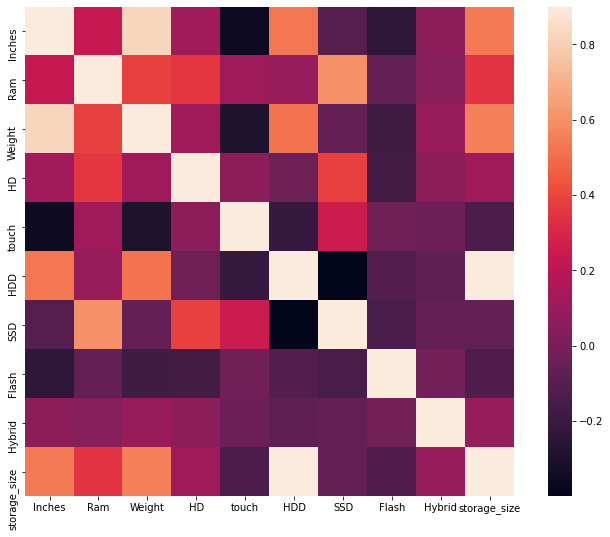

In [36]:
corrmat = clean_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9,square=True)

### 결측치 없애기

<AxesSubplot:xlabel='Weight', ylabel='Inches'>

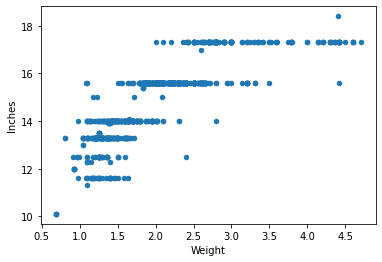

In [37]:
tmp = pd.concat([clean_data['Inches'],clean_data['Weight']],axis=1)
tmp.plot.scatter(y='Inches', x='Weight')

In [38]:
i=0
for n in clean_data['Inches'].isnull():
    if n == True :
        print(n)
        if clean_data['Weight'][i]<1.7:
            clean_data['Inches'][i] = 13
        elif clean_data['Weight'][i]< 3.0:
            clean_data['Inches'][i] = 15
        else:
            clean_data['Inches'][i] = 17
    i+=1



True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
<ipython-input-38-82f7a70cf7cf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Inches'][i] = 15
<ipython-input-38-82f7a70cf7cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Inches'][i] = 13


In [39]:
'''clean_data['Inches'] = clean_data['Inches'].fillna(clean_data['Inches'].mean())'''

"clean_data['Inches'] = clean_data['Inches'].fillna(clean_data['Inches'].mean())"

In [40]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1303 non-null   object 
 1   TypeName      1303 non-null   object 
 2   Inches        1303 non-null   float64
 3   Ram           1303 non-null   int32  
 4   Gpu           1303 non-null   object 
 5   OpSys         1303 non-null   object 
 6   Weight        1303 non-null   float64
 7   cpu_per       1303 non-null   object 
 8   cpu_com       1303 non-null   object 
 9   HD            1303 non-null   float64
 10  touch         1303 non-null   float64
 11  HDD           1303 non-null   float64
 12  SSD           1303 non-null   float64
 13  Flash         1303 non-null   float64
 14  Hybrid        1303 non-null   float64
 15  storage_size  1303 non-null   float64
dtypes: float64(9), int32(1), object(6)
memory usage: 157.9+ KB


## 이상치 확인

<AxesSubplot:xlabel='Inches', ylabel='price'>

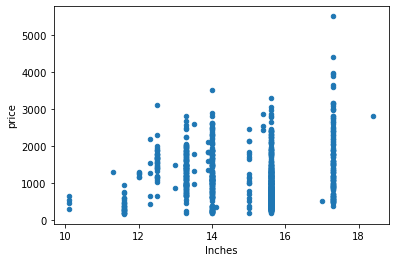

In [41]:
var = 'Inches'
tmp = pd.concat([train_y,clean_data[var][:1042]],axis=1)
tmp.plot.scatter(x=var, y='price')

<AxesSubplot:xlabel='SSD', ylabel='price'>

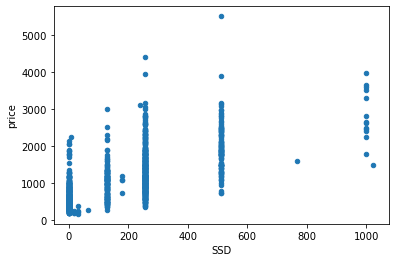

In [42]:
var = 'SSD'
tmp = pd.concat([train_y,clean_data[var][:1042]],axis=1)
tmp.plot.scatter(x=var, y='price')

<AxesSubplot:xlabel='HD', ylabel='price'>

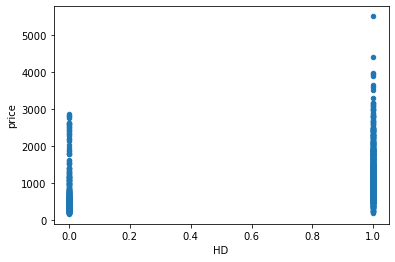

In [43]:
var = 'HD'
tmp = pd.concat([train_y,clean_data[var][:1042]],axis=1)
tmp.plot.scatter(x=var, y='price')

<AxesSubplot:xlabel='Ram', ylabel='price'>

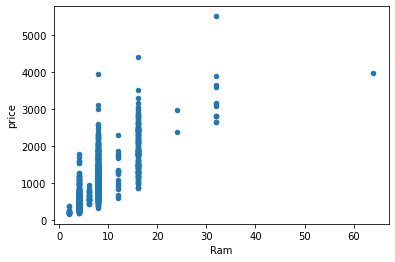

In [44]:
var = 'Ram'
tmp = pd.concat([train_y,clean_data[var][:1042]],axis=1)
tmp.plot.scatter(x=var, y='price')

In [45]:
tmp[tmp['price']>5000].index

Int64Index([669], dtype='int64')

In [46]:
clean_data.iloc[669,:]

Company                  Razer
TypeName                Gaming
Inches                    17.3
Ram                         32
Gpu             Nvidia GeForce
OpSys               Windows 10
Weight                    3.49
cpu_per                Core i7
cpu_com                  Intel
HD                           1
touch                        1
HDD                          0
SSD                        512
Flash                        0
Hybrid                       0
storage_size               512
Name: 669, dtype: object

In [47]:
train_y_outliar = train_y.drop(index=669,axis=0)
clean_data_outliar = clean_data.drop(index=669,axis=0)

### 대소문자 값 맞추기

In [48]:
from pandas.api.types import is_object_dtype
for col in clean_data_outliar.columns:
    if is_object_dtype(clean_data_outliar[col]):
        print(col)
        clean_data_outliar[col] = clean_data_outliar[col].apply(lambda x : x.upper())

Company
TypeName
Gpu
OpSys
cpu_per
cpu_com


In [49]:
print(clean_data_outliar['cpu_per'].value_counts())
print('====================')
print(clean_data_outliar['cpu_com'].value_counts())
print('====================')
print(clean_data_outliar['OpSys'].value_counts())
print('====================')
print(clean_data_outliar['TypeName'].value_counts())

CORE I7          526
CORE I5          423
CORE I3          136
CELERON DUAL      80
PENTIUM QUAD      27
CORE M            19
A9-SERIES         17
A6-SERIES         11
E-SERIES           9
A12-SERIES         8
CELERON QUAD       8
ATOM X5-Z8350      7
A10-SERIES         6
RYZEN              4
A8-SERIES          4
ATOM X5-Z8550      4
PENTIUM DUAL       3
XEON E3-1505M      2
XEON E3-1535M      2
FX                 2
A4-SERIES          1
ATOM X5-Z8300      1
CORTEX             1
ATOM Z8350         1
Name: cpu_per, dtype: int64
INTEL      1239
AMD          62
SAMSUNG       1
Name: cpu_com, dtype: int64
WINDOWS 10      1071
NO OS             66
LINUX             62
WINDOWS 7         45
CHROME OS         27
MACOS             13
MAC OS X           8
WINDOWS 10 S       8
ANDROID            2
Name: OpSys, dtype: int64
NOTEBOOK              727
GAMING                204
ULTRABOOK             196
2 IN 1 CONVERTIBLE    121
WORKSTATION            29
NETBOOK                25
Name: TypeName, dtype

In [50]:
clean_data_outliar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1302 non-null   object 
 1   TypeName      1302 non-null   object 
 2   Inches        1302 non-null   float64
 3   Ram           1302 non-null   int32  
 4   Gpu           1302 non-null   object 
 5   OpSys         1302 non-null   object 
 6   Weight        1302 non-null   float64
 7   cpu_per       1302 non-null   object 
 8   cpu_com       1302 non-null   object 
 9   HD            1302 non-null   float64
 10  touch         1302 non-null   float64
 11  HDD           1302 non-null   float64
 12  SSD           1302 non-null   float64
 13  Flash         1302 non-null   float64
 14  Hybrid        1302 non-null   float64
 15  storage_size  1302 non-null   float64
dtypes: float64(9), int32(1), object(6)
memory usage: 167.8+ KB


## Skew

In [51]:
skew_col = ['Inches','Ram','Weight','HDD','SSD','Flash','Hybrid','storage_size']
skwness = list(map(lambda x : (clean_data_outliar[x]).skew(),skew_col))
print(skwness)
train_y_outliar.skew()

[-0.4361575338063553, 2.685788033439589, 1.1478499553035522, 0.8867187409570279, 1.3741285564244285, 11.087124018165879, 10.50333044809743, 1.0477432005695089]


1.1262640062335678

## Ram, Weight, storage_size, Y -> log 또는 BoxCox 변환

In [52]:
log_col = ['Ram', 'Weight','storage_size']

In [53]:
clean_data_outliar['Ram'].value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     16
24      3
64      1
Name: Ram, dtype: int64

## Scale

C:\Users\ant67\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


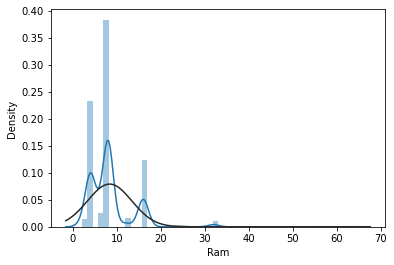

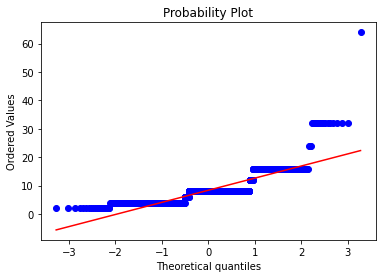

In [54]:
val='Ram'
sns.distplot(clean_data_outliar[val], fit=norm)
fig = plt.figure()
res = stats.probplot(clean_data_outliar[val], plot=plt)

C:\Users\ant67\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


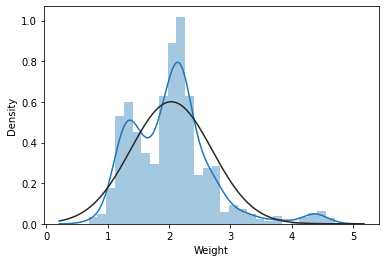

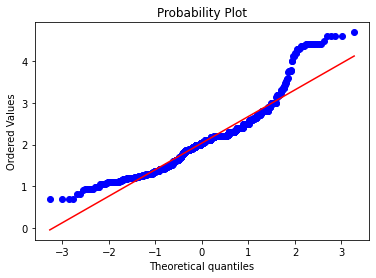

In [55]:
val='Weight'
sns.distplot(clean_data_outliar[val], fit=norm)
fig = plt.figure()
res = stats.probplot(clean_data_outliar[val], plot=plt)

C:\Users\ant67\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


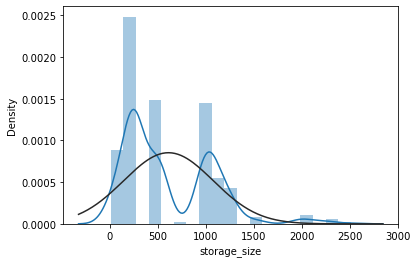

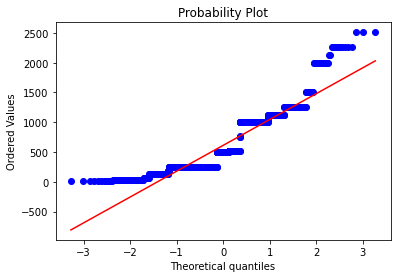

In [56]:
val='storage_size'
sns.distplot(clean_data_outliar[val], fit=norm)
fig = plt.figure()
res = stats.probplot(clean_data_outliar[val], plot=plt)

C:\Users\ant67\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


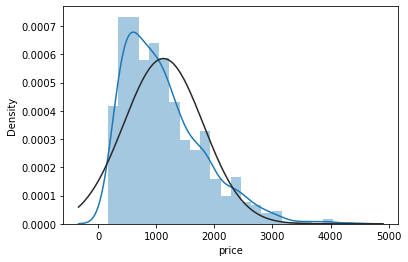

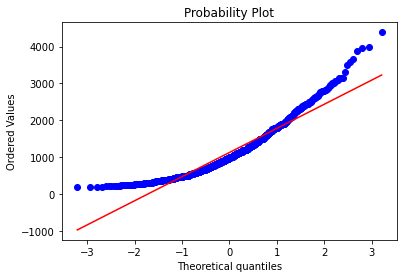

In [57]:
sns.distplot(train_y_outliar, fit=norm)
fig = plt.figure()
res = stats.probplot(train_y_outliar, plot=plt)

In [58]:
log_data = clean_data_outliar.copy()
bc_data = clean_data_outliar.copy()

C:\Users\ant67\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ant67\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ant67\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

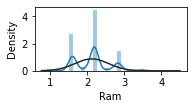

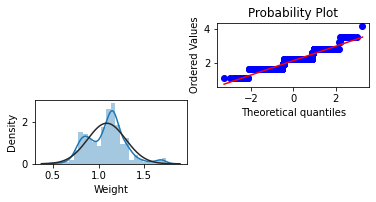

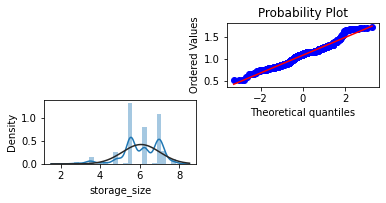

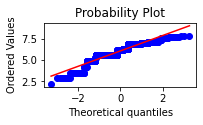

In [59]:
index = 1
for val in log_col:
    plt.subplot(3,2,index)
    log_data[val] = np.log1p(clean_data_outliar[val])
    sns.distplot(log_data[val], fit=norm)
    fig = plt.figure()
    index +=1
    plt.subplot(3,2,index)
    res = stats.probplot(log_data[val], plot=plt)
    index +=1

## BoxCox

C:\Users\ant67\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ant67\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ant67\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

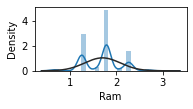

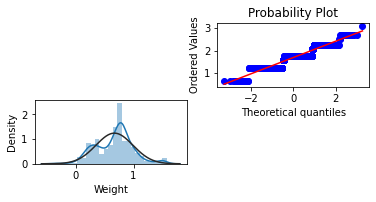

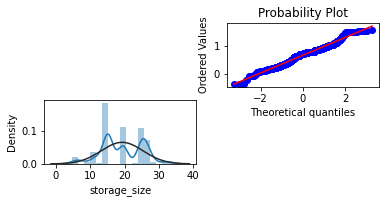

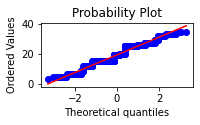

In [60]:
index = 1
for val in log_col:
    plt.subplot(3,2,index)
    bc_data[val], bc_lambda = stats.boxcox(clean_data_outliar[val])
    sns.distplot(bc_data[val], fit=norm)
    fig = plt.figure()
    index +=1
    plt.subplot(3,2,index)
    res = stats.probplot(bc_data[val], plot=plt)
    index +=1

## Y scale

In [61]:
log_y = train_y_outliar.copy()
log_y = np.log1p(log_y)

C:\Users\ant67\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


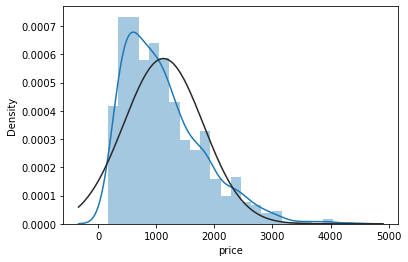

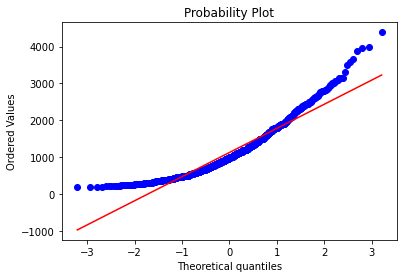

In [62]:
sns.distplot(train_y_outliar, fit=norm)
fig = plt.figure()
res = stats.probplot(train_y_outliar, plot=plt)

C:\Users\ant67\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


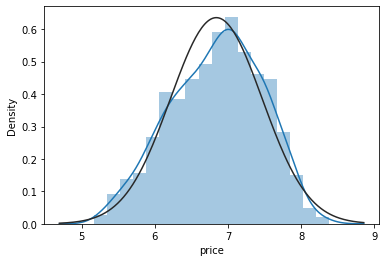

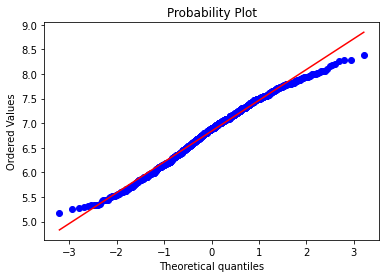

In [63]:
sns.distplot(log_y, fit=norm)
fig = plt.figure()
res = stats.probplot(log_y, plot=plt)

## Getting dummy categorical features

In [64]:
print(bc_data.shape)
print(log_y.shape)
print(train_y_outliar.shape)

(1302, 16)
(1041,)
(1041,)


In [65]:
df = bc_data.copy()
df.shape

(1302, 16)

In [66]:
#df = df.reset_index(drop=True)

In [67]:
df = pd.get_dummies(df)
df.shape

(1302, 83)

## Robust Scaler

In [68]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
train_data_scaled = scaler.fit_transform(df)

#### drop 한 index = 669 -> train(~1041 index:1040)

In [69]:
train = df[:][:1041].copy()
test = df[:][1041:].copy()
train_y  = log_y.copy()
print(train.shape)
print(test.shape)
print(train_y.shape)
print(type(train_y))
print(type(train))

(1041, 83)
(261, 83)
(1041,)
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


## train_valid split

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, train_y, test_size=.25)

## Modeling

In [71]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

In [98]:
lr_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()
ENet2 = ElasticNet(l1_ratio=0.2)
ENet5 = ElasticNet(l1_ratio=0.5)
ENet8 = ElasticNet(l1_ratio=0.8)
KRR = KernelRidge(kernel='polynomial', degree=2, coef0=2.5)
rf_reg = RandomForestRegressor()
xgb_reg = xgb.XGBRegressor(n_estimators = 1500,learning_rate=0.05, colsample_bytree=0.5, subsample=0.66)
lgbm_reg = lgb.LGBMRegressor(objective='regression', n_estimators=1500, learning_rate=0.05, num_leaves=4, subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
rf_reg = RandomForestRegressor(n_estimators = 100)

In [73]:
def print_best_params(model,params):
    grid_model = GridSearchCV(model, param_grid=params,scoring='neg_mean_squared_error',cv=5)
    grid_model.fit(train,train_y)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print(f'({model.__class__.__name__} 5 cv 시 최적 평균 rmse 값 : {np.round(rmse,4)}, 최적 alpha:{grid_model.best_params_})')


## 파라미터 튜닝

In [74]:
ridge_params = {'alpha':[0.1, 1, 1.5,2, 2.5]}
lasso_params = {'alpha':[0.0008, 0.001, 0.002, 0.005, 0.008]}
ENet_params = {'alpha':[0.0001, 0.0003, 0.0005, 0.0007, 0.001, 0.005]}
KRR_params = {'alpha':[ 0.03, 0.1, 0.3, 0.4, 0.5, 0.6, 0.7]}
xgb_params = {'max_depth':[2,3,4]}
lgbm_params = {'bagging_fraction':[0.2, 0.3, 0.4]}
lgbm_params_2 = {'subsample':[0.5, 0.6, 0.7]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)
print_best_params(ENet2, ENet_params)
print_best_params(ENet5, ENet_params)
print_best_params(ENet8, ENet_params)
print_best_params(KRR, KRR_params)
print_best_params(xgb_reg, xgb_params)
print_best_params(lgbm_reg, lgbm_params)
print_best_params(lgbm_reg, lgbm_params_2)

(Ridge 5 cv 시 최적 평균 rmse 값 : 0.245, 최적 alpha:{'alpha': 1.5})
(Lasso 5 cv 시 최적 평균 rmse 값 : 0.2457, 최적 alpha:{'alpha': 0.0008})
(ElasticNet 5 cv 시 최적 평균 rmse 값 : 0.2444, 최적 alpha:{'alpha': 0.001})
(ElasticNet 5 cv 시 최적 평균 rmse 값 : 0.2441, 최적 alpha:{'alpha': 0.0007})
(ElasticNet 5 cv 시 최적 평균 rmse 값 : 0.244, 최적 alpha:{'alpha': 0.0005})
(KernelRidge 5 cv 시 최적 평균 rmse 값 : 0.2514, 최적 alpha:{'alpha': 0.7})


KeyboardInterrupt: 

In [168]:
lasso_params = {'alpha':[0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]}
print_best_params(lasso_reg, lasso_params)

(Lasso 5 cv 시 최적 평균 rmse 값 : 0.2442, 최적 alpha:{'alpha': 0.0004})


## XGB 추가 하이퍼파라미터 튜닝

In [170]:
xgb_reg = xgb.XGBRegressor(n_estimators = 1500,learning_rate=0.05, colsample_bytree=0.5, max_depth = 3, subsample=0.66)
xgb_params = {'max_depth':[2,3],'min_child_weight':[2,3,4,5]}
print_best_params(xgb_reg, xgb_params)

(XGBRegressor 5 cv 시 최적 평균 rmse 값 : 0.1865, 최적 alpha:{'max_depth': 3, 'min_child_weight': 3})


In [171]:
xgb_reg = xgb.XGBRegressor(n_estimators = 1500,learning_rate=0.05, colsample_bytree=0.5, max_depth = 3, subsample=0.66, min_child_weight=3)
xgb_params = {'gamma':[i/10.0 for i in range(0,5)]}
print_best_params(xgb_reg, xgb_params)

(XGBRegressor 5 cv 시 최적 평균 rmse 값 : 0.1865, 최적 alpha:{'gamma': 0.0})


In [172]:
xgb_reg = xgb.XGBRegressor(n_estimators = 1500,learning_rate=0.05, colsample_bytree=0.5, max_depth = 3, subsample=0.66, min_child_weight=3)
xgb_params = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}
print_best_params(xgb_reg, xgb_params)

(XGBRegressor 5 cv 시 최적 평균 rmse 값 : 0.1865, 최적 alpha:{'reg_alpha': 1e-05})


In [198]:
xgb_reg = xgb.XGBRegressor(n_estimators = 1500,learning_rate=0.05, colsample_bytree=0.5, max_depth = 3, subsample=0.66, min_child_weight=3)
xgb_params = {'subsample':[i/100.0 for i in range(61,66)]}
print_best_params(xgb_reg, xgb_params)

(XGBRegressor 5 cv 시 최적 평균 rmse 값 : 0.1879, 최적 alpha:{'subsample': 0.64})


In [176]:
xgb_reg = xgb.XGBRegressor(n_estimators = 1500,learning_rate=0.05, colsample_bytree=0.5, max_depth = 3, subsample=0.64, min_child_weight=3)
xgb_params = {'colsample_bytree':[0.9,1]}
print_best_params(xgb_reg, xgb_params)

(XGBRegressor 5 cv 시 최적 평균 rmse 값 : 0.1882, 최적 alpha:{'colsample_bytree': 0.9})


In [187]:
xgb_reg = xgb.XGBRegressor(n_estimators = 1500,learning_rate=0.05, colsample_bytree=0.5, max_depth = 3, subsample=0.66, min_child_weight=3)
xgb_params = {'colsample_bytree':[0.4, 0.5]}
print_best_params(xgb_reg, xgb_params)

(XGBRegressor 5 cv 시 최적 평균 rmse 값 : 0.1865, 최적 alpha:{'colsample_bytree': 0.5})


## LightBGM 추가 하이퍼파라미터 튜닝

In [175]:
lgbm_reg = lgb.LGBMRegressor(objective='regression', n_estimators=1500, learning_rate=0.05, subsample=0.5, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
lgbm_params = {'max_depth':range(3, 10)}
print_best_params(lgbm_reg, lgbm_params)

(LGBMRegressor 5 cv 시 최적 평균 rmse 값 : 0.1953, 최적 alpha:{'max_depth': 7})


In [186]:
lgbm_reg = lgb.LGBMRegressor(objective='regression', n_estimators=1500, learning_rate=0.05, subsample=0.5, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1, max_depth = 7)
lgbm_params = {'num_leaves':range(20,30)}
print_best_params(lgbm_reg, lgbm_params)

(LGBMRegressor 5 cv 시 최적 평균 rmse 값 : 0.1951, 최적 alpha:{'num_leaves': 21})


In [189]:
lgbm_reg = lgb.LGBMRegressor(objective='regression', n_estimators=1500, learning_rate=0.05, subsample=0.5, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1, max_depth = 7, num_leaves=21)
lgbm_params = {'colsample_bytree':[0.3, 0.35, 0.4]}
print_best_params(lgbm_reg, lgbm_params)

(LGBMRegressor 5 cv 시 최적 평균 rmse 값 : 0.1951, 최적 alpha:{'colsample_bytree': 0.4})


## 랜덤포레스트

In [100]:
rf_params = {'n_estimators':[10, 100, 200, 300]}
print_best_params(rf_reg, rf_params)

(RandomForestRegressor 5 cv 시 최적 평균 rmse 값 : 0.2082, 최적 alpha:{'n_estimators': 300})


In [101]:
rf_params = {'n_estimators':[300, 500, 1000]}
print_best_params(rf_reg, rf_params)

(RandomForestRegressor 5 cv 시 최적 평균 rmse 값 : 0.2082, 최적 alpha:{'n_estimators': 500})


In [103]:
rf_params = {'n_estimators':[500] , 'max_depth':[3,6,8,10],'min_samples_leaf':[30,50,70]}
print_best_params(rf_reg, rf_params)

(RandomForestRegressor 5 cv 시 최적 평균 rmse 값 : 0.3027, 최적 alpha:{'max_depth': 6, 'min_samples_leaf': 30, 'n_estimators': 500})


In [106]:
rf_params = {'n_estimators':[500,1500] , 'max_depth':[6],'min_samples_leaf':[30,60,80,100]}
print_best_params(rf_reg, rf_params)

(RandomForestRegressor 5 cv 시 최적 평균 rmse 값 : 0.3031, 최적 alpha:{'max_depth': 6, 'min_samples_leaf': 30, 'n_estimators': 1500})


### ridge = {'alpha':1.5}
### lasso = {'alpha':0.0004}
### ENet = {'l1_ratio':0.8, 'alpha':0.0005}
### KRR = {'alpha':0.7}
### xgb = {'max_depth':3, 'min_child_weight': 3, 'reg_alpha': 1e-05}
### lgbm = {'bagging_fraction':0.2}
### lgbm = {'subsample':0.5, 'max_depth':7, 'num_leaves': 21}

In [133]:
ridge_reg = Ridge(alpha=1.5)
lasso_reg = Lasso(alpha=0.0004)
ENet = ElasticNet(alpha=0.0005, l1_ratio=0.8)
KRR = KernelRidge(alpha=0.7, kernel='polynomial', degree=2, coef0=2.5)
xgb_reg = xgb.XGBRegressor(n_estimators = 1500,learning_rate=0.05, colsample_bytree=0.5, subsample=0.64, max_depth=3, min_child_weight = 3, reg_alpha = 1e-05)
lgbm_reg = lgb.LGBMRegressor(objective='regression', n_estimators=1500, learning_rate=0.05, num_leaves=21, max_depth = 7, subsample=0.5, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
rf_reg = RandomForestRegressor(n_estimators = 500, max_depth = 6, min_samples_leaf = 30, min_samples_split=7)


In [121]:
ridge_reg.fit(train, train_y)
ridge_train_pred = np.expm1(ridge_reg.predict(train)
print(rmsle(train_y_outliar.values,ridge_train_pred))

1308.8167000872302


In [120]:
lasso_reg.fit(train, train_y)
lasso_train_pred = np.expm1(lasso_reg.predict(train))
print(rmsle(train_y_outliar.values,lasso_train_pred))

1308.8172486299386


In [119]:
ENet.fit(train, train_y)
ENet_train_pred = np.expm1(ENet.predict(train))
print(rmsle(train_y_outliar.values,ENet_train_pred))

327.8117914204322


In [118]:
KRR.fit(train, train_y)
KRR_train_pred = np.expm1(KRR.predict(train))
print(rmsle(train_y_outliar.values,KRR_train_pred))

278.99725735957304


In [117]:
xgb_reg.fit(train, train_y)
xgb_reg_train_pred = np.expm1(xgb_reg.predict(train))
print(rmsle(train_y_outliar.values,xgb_reg_train_pred))

157.21904580756066


In [132]:
rf_reg.fit(train, train_y)
rf_reg_train_pred = np.expm1(rf_reg.predict(train))
print(rmsle(train_y_outliar.values,rf_reg_train_pred))

368.5654609394098


## Valid

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, train_y, test_size=.25, shuffle = True)

In [110]:
X_train_n = X_train.values
X_test_n = X_val.values
y_train_n = y_train.values
y_test_n = y_val.values
print(train.shape)
print(test.shape)
print(train_y.shape)

(1041, 83)
(261, 83)
(1041,)


In [111]:
rf_reg = RandomForestRegressor(n_estimators = 500, max_depth = 6, min_samples_leaf = 30)
rf_reg.fit(X_train_n, y_train_n)
rf_reg_train_pred = np.expm1(rf_reg.predict(X_test_n))
print(rmsle(y_test_n,rf_reg_train_pred))

1225.5412248268506


### Cross validation

In [76]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

# 앙상블 2

In [134]:
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    kf = KFold(n_splits=n_folds, shuffle=False)
    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__, ' model 시작')

    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print('\t 폴드 세트: ',folder_counter, ' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        model.fit(X_tr, y_tr)
        train_fold_pred[valid_index,:] = model.predict(X_te).reshape(-1,1)
        test_pred[:,folder_counter] = model.predict(X_test_n)

    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    return train_fold_pred, test_pred_mean


In [78]:
'''
X_train_n = X_train.values
X_test_n = X_val.values
y_train_n = y_train.values
print(train.shape)
print(test.shape)
print(train_y.shape)
'''

'\nX_train_n = X_train.values\nX_test_n = X_val.values\ny_train_n = y_train.values\nprint(train.shape)\nprint(test.shape)\nprint(train_y.shape)\n'

In [135]:
X_train_n = train.values
X_test_n = test.values
y_train_n = train_y.values
print(train.shape)
print(test.shape)
print(train_y.shape)

(1041, 83)
(261, 83)
(1041,)


In [136]:
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n,5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n,5)
ENet_train, ENet_test = get_stacking_base_datasets(ENet, X_train_n, y_train_n, X_test_n,5)
KRR_train, KRR_test = get_stacking_base_datasets(KRR, X_train_n, y_train_n, X_test_n,5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n,5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n,5)
rf_train, rf_test = get_stacking_base_datasets(rf_reg, X_train_n, y_train_n, X_test_n,5)

Ridge  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
ElasticNet  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
KernelRidge  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
LGBMRegressor  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
RandomForestRegressor  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 


In [137]:
Stack_final_X_train = np.concatenate((rf_train,ENet_train, KRR_train),axis=1)
Stack_final_X_test = np.concatenate((rf_test,ENet_test, KRR_test),axis=1)

meta_model = xgb_reg

In [138]:
meta_model.fit(Stack_final_X_train, train_y)
final = np.expm1(meta_model.predict(Stack_final_X_train))
rmsle(train_y_outliar.values,final)

182.287082503203

In [139]:
stacked_pred = np.expm1(meta_model.predict(Stack_final_X_test))

## lgbm & stacked

In [140]:
lgbm_reg.fit(train, train_y)
lgbm_train_pred = np.expm1(lgbm_reg.predict(train))
lgbm_pred = np.expm1(lgbm_reg.predict(test))
print(rmsle(train_y_outliar.values,lgbm_train_pred))

156.83620859541608


## Ensemble prediction

In [141]:
ensemble = stacked_pred*0.6 + lgbm_pred*0.4
ensemble_train = final*0.6 + lgbm_train_pred*0.4
print(rmsle(train_y_outliar.values, ensemble_train))

155.97557569073047


In [142]:
ensemble2 = stacked_pred*0.7 + lgbm_pred*0.3
ensemble_train2 = final*0.7 + lgbm_train_pred*0.3
print(rmsle(train_y_outliar.values, ensemble_train2))

160.84917709447893


In [143]:
ensemble3 = stacked_pred*0.5 + lgbm_pred*0.5
ensemble_train3 = final*0.5 + lgbm_train_pred*0.5
print(rmsle(train_y_outliar.values, ensemble_train3))

152.44111147690327


# Submission

In [144]:
sub = pd.DataFrame(ensemble3)
sub.to_csv('이보림_Adv_price.csv')